In [1]:
from src.preprocessing.preprocess_ucr import UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.models.vqvae_representations import PretrainedVQVAE, BaseVQVAE
from src.experiments.tester import RepTester, PCA_plots
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import torch
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
%matplotlib widget

In [2]:
dataset_analysis = 'CBF'

In [3]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

config['dataset']['dataset_name'] = dataset_analysis

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader, test_data_loader = [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

input_length = train_data_loader.dataset.X.shape[-1]

contrastive_vqvae = PretrainedVQVAE(input_length, config, contrastive=True)
vqvae = PretrainedVQVAE(input_length, config)

self.X_train.shape: (30, 128)
self.X_test.shape: (900, 128)
# unique labels (train): [0 1 2]
# unique labels (test): [0 1 2]
contrastive_encoder-CBF.ckpt loaded..
contrastive_decoder-CBF.ckpt loaded..
contrastive_vq_model-CBF.ckpt loaded..
encoder-CBF.ckpt loaded..
decoder-CBF.ckpt loaded..
vq_model-CBF.ckpt loaded..


In [4]:
tester = RepTester(vqvae, train_data_loader, test_data_loader, concatenate_zqs=False)

labels = np.unique(dataset_importer.Y_train.reshape(-1))

ytr, yte = tester.get_y()

zqs_train, zqs_test = tester.flatten_zqs()
len(zqs_train)
# zqs_train.shape

30

In [8]:
def PCA_plt(zqs, y, n_components=2):   
    embs = PCA(n_components=n_components).fit_transform(zqs)
    plt.scatter(embs[:,0],embs[:,1], c = y)
    plt.show()



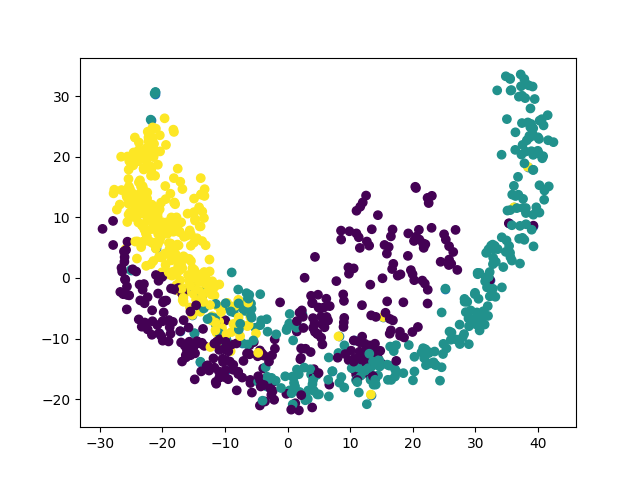

In [9]:
PCA_plt(zqs_test, yte)

In [31]:

# zqs_train = vqvae.get_flatten_zqs_s(train_data_loader)[0]
# zqs_test = vqvae.get_flatten_zqs_s(test_data_loader)[0]

# # zqs_train.shape

# zqs = torch.cat((zqs_train,zqs_test), 0)

# zqs.shape


torch.Size([930, 2560])

In [6]:
result1 = tester.test_flatten_zqs()

(930, 2560)


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.73352545  0.73352545  0.57314032 ... -0.18175456 -0.23244421
 -0.18175456].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.